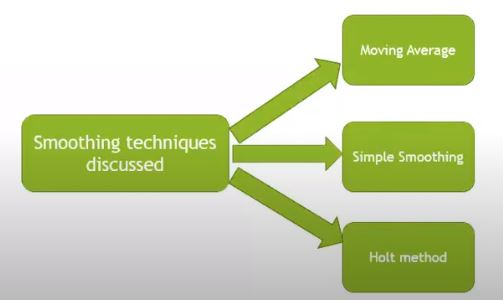

In [80]:
from IPython.display import Image
Image(r"D:\01_DATA_SCIENCE_FINAL\D-00000-TIMESERIES\D-TIMESERIES_CODES\Amn_TimeSeies\AMAN-Time Series Analysis\Smoothing.JPG", height=2400, width=2400)

# Importing Data and Packages

In [18]:
import os
os.chdir(r"D:\01_DATA_SCIENCE_FINAL\D-00000-TIMESERIES\D-TIMESERIES_CODES\Amn_TimeSeies\AMAN-Time Series Analysis")

In [19]:
pwd

'D:\\01_DATA_SCIENCE_FINAL\\D-00000-TIMESERIES\\D-TIMESERIES_CODES\\Amn_TimeSeies\\AMAN-Time Series Analysis'

In [20]:
import pandas as pd
from matplotlib import pyplot
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
#Data set link Kaggle
#https://www.kaggle.com/shenba/electricity-production

In [43]:
electicitytimeseries = pd.read_csv(r"D:\01_DATA_SCIENCE_FINAL\D-00000-TIMESERIES\D-TIMESERIES_CODES\Amn_TimeSeies\AMAN-Time Series Analysis\Electric_Production.csv", header=0, index_col=0)
electicitytimeseries.head(20)

,IPG2211A2N
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151
6/1/1985,58.0904
7/1/1985,62.6202
8/1/1985,63.2485
9/1/1985,60.5846


In [56]:
electicitytimeseries.tail(2)

,IPG2211A2N
DATE,
12/1/2017,114.7212
1/1/2018,129.4048


In [42]:
electicitytimeseries.shape

(397, 1)

In [46]:
electicitytimeseries.columns

Index(['IPG2211A2N'], dtype='object')

# Moving Average Method

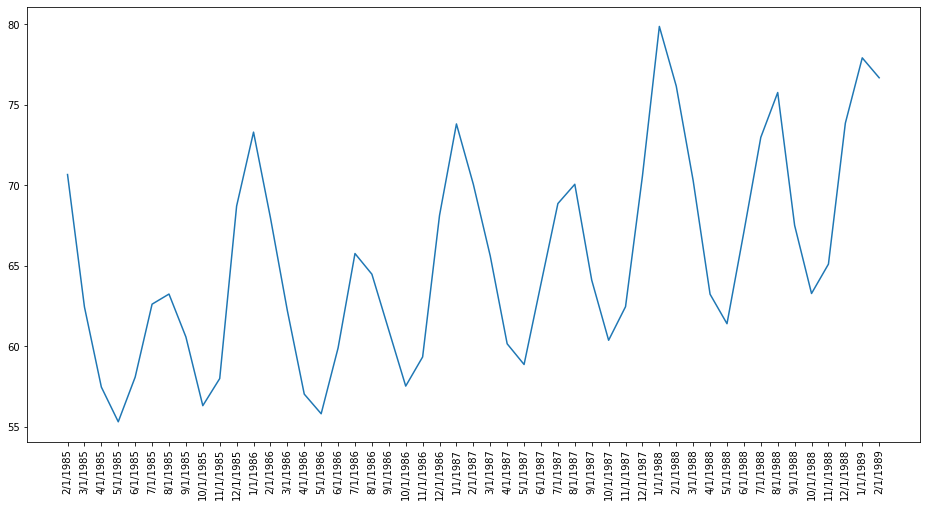

In [52]:
plt.figure(figsize=(16,8))
plt.plot(electicitytimeseries['IPG2211A2N'][1:50])
plt.xticks(rotation='90')
plt.show()

In [53]:
#Rolling average transform
rollingseries = electicitytimeseries[1:50].rolling(window=5)

rolling_mean = rollingseries.mean() #Finding rolling mean MA(5)

print(rolling_mean.head(10))

           IPG2211A2N
DATE                 
2/1/1985          NaN
3/1/1985          NaN
4/1/1985          NaN
5/1/1985          NaN
6/1/1985     60.79982
7/1/1985     59.18946
8/1/1985     59.34912
9/1/1985     59.97176
10/1/1985    60.17182
11/1/1985    60.15384


<Figure size 1152x576 with 0 Axes>

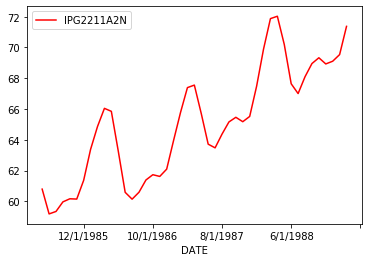

In [55]:
# Plot transformed dataset
plt.figure(figsize=(16,8))
rolling_mean.plot(color ='red')
pyplot.show()

           IPG2211A2N
DATE                 
2/1/1985          NaN
3/1/1985          NaN
4/1/1985          NaN
5/1/1985          NaN
6/1/1985          NaN
7/1/1985          NaN
8/1/1985          NaN
9/1/1985          NaN
10/1/1985         NaN
11/1/1985    60.47683
12/1/1985    60.28108
1/1/1986     61.36663


<Figure size 1152x576 with 0 Axes>

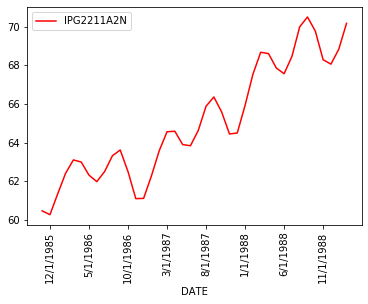

In [74]:
#Rolling average transform
rollingseries = electicitytimeseries[1:50].rolling(window=10)

rolling_mean = rollingseries.mean() #Finding rolling mean MA(5)

print(rolling_mean.head(12))

# Plot transformed dataset
plt.figure(figsize=(16,8))
rolling_mean.plot(color ='red')
plt.xticks(rotation=90)
pyplot.show()

# Simple Exponential Smoothng

In [71]:
# Exponential somoothing - Single

data = electicitytimeseries[1:50]

fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)

fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8, optimized=False)

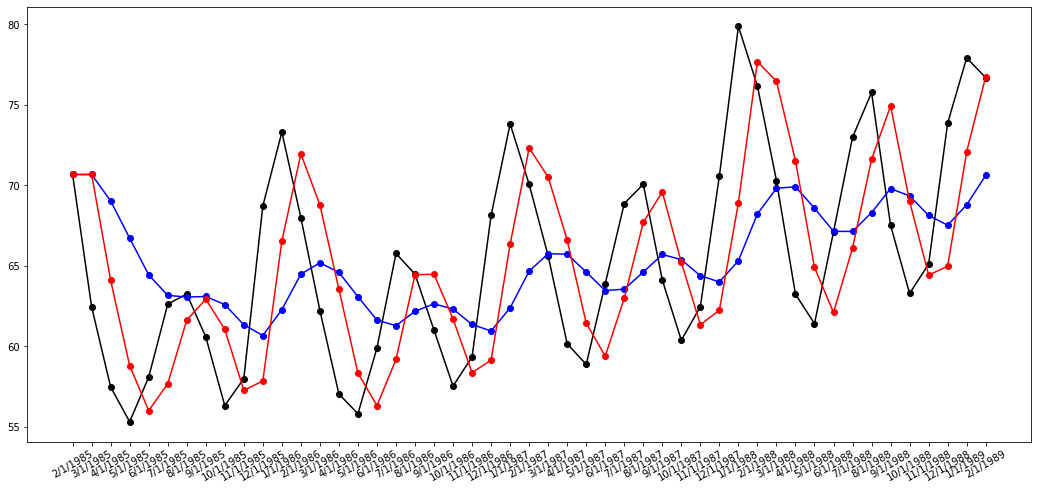

In [72]:
# Plot Simple Exponential Smoothng
plt.figure(figsize=(18,8))
plt.plot(electicitytimeseries[1:50], marker='o', color ='black', )
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues, marker='o', color ='blue')
plt.plot(fit2.fittedvalues, marker='o', color ='red')
pyplot.show()

# Holt method for exponential smoothing

In [73]:
fit1 = Holt(data).fit() # Linear trend

fit2 = Holt(data, exponential=True).fit() #Exponential trend

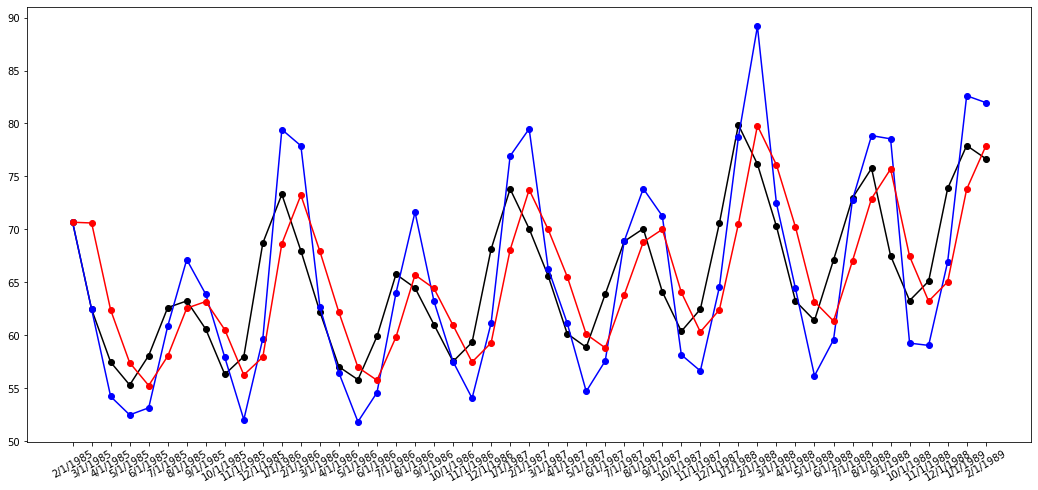

In [75]:
# Plot Simple Holt Smoothng
plt.figure(figsize=(18,8))
plt.plot(electicitytimeseries[1:50], marker='o', color ='black', )
plt.xticks(rotation=30)

plt.plot(fit1.fittedvalues, marker='o', color ='blue')
plt.plot(fit2.fittedvalues, marker='o', color ='red')
pyplot.show()